## Fire, Vulcanus and Archeus in Paracelsus

#### This file represents the backing code for the Paracelsus article (Ambix)

#### Acknowledgments: Thank you to Dr Urs Leo Gantenbein and Dr Didier Kahn for making available electronic copies of the transcriptions of the Paracelsus corpus as published by Johannes Huser between 1589 and 1605.

#### Please refer to https://www.paracelsus-project.org/ for details on how transcription was carried out. The transcriptions were saved in Word format, divided by volume. In advance of carrying out the work below, I put together the transcriptions into one text document (.txt). I made all the text lower case, removed non-alpha characters and tokenised it with the support of the NLTK module of Python. The resulting list was placed in a json file for fast access. To run this in the current form you need to create a Paracelsus folder separate from the working directory and download the json file in it.

In [47]:
"""Import the necessary libraries"""
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import Counter
import seaborn as sns
import squarify

In [11]:
"""Loading the json file"""

with open("Paracelsus/paraloweralphatokens.json", 'r') as f:
    lowercase = json.load(f)
print(lowercase[0:500])

['c', 'works/he01.txt', 'erster', 'theil', 'der', 'bücher', 'vnd', 'schrifften', 'desedlen', 'hochgelehrtenvnd', 'bewehrten', 'philosophivnnd', 'medici', 'philippi', 'theophrastibombast', 'von', 'hohenheim/', 'paracelsigenannt', 'jetzt', 'auffs', 'new', 'auß', 'den', 'originalien', 'vndtheophrasti', 'eigner', 'handschrifft', 'souiel', 'derselben', 'zubekommengewesen', 'auffs', 'trewlichst', 'vndfleissigst', 'an', 'tag', 'geben', 'durchiohannem', 'hvservm', 'brisgoivmchurfürstlichen', 'cölnischen', 'rhat', 'vnndmedicvm', 'in', 'diesem', 'theil', 'werden', 'begriffen', 'die', 'bücher', 'welche', 'von', 'vrsprung', 'vnd', 'herkommen', 'aller', 'kranckheiten', 'handeln', 'in', 'genere', 'deren', 'catalogus', 'nach', 'der', 'præfation', 'an', 'den', 'leser', 'zu', 'finden', 'adiunctus', 'est', 'index', 'rerum', 'verborum', 'accuratiss', 'copiosissimus.getruckt', 'zu', 'basel', 'durchconrad', 'waldkirch', 'anno', 'm.', 'd.', 'lxxxix', 'dem', 'hochwürdigsten', 'in', 'gott', 'durchleüchtigsten

In [12]:
"""Calculating total number of tokens in Paracelsus's corpus"""
print("Number of word tokens: ", len(lowercase))

Number of word tokens:  2314632


In [13]:
"""To proceed to a RegEx search, the tokenised list must be turned into a long string. Here I am turning the whole Paracelsus corpus into a string object"""
strlowercase = " ".join(lowercase)
print(strlowercase[:1500]) #checking contents

c works/he01.txt erster theil der bücher vnd schrifften desedlen hochgelehrtenvnd bewehrten philosophivnnd medici philippi theophrastibombast von hohenheim/ paracelsigenannt jetzt auffs new auß den originalien vndtheophrasti eigner handschrifft souiel derselben zubekommengewesen auffs trewlichst vndfleissigst an tag geben durchiohannem hvservm brisgoivmchurfürstlichen cölnischen rhat vnndmedicvm in diesem theil werden begriffen die bücher welche von vrsprung vnd herkommen aller kranckheiten handeln in genere deren catalogus nach der præfation an den leser zu finden adiunctus est index rerum verborum accuratiss copiosissimus.getruckt zu basel durchconrad waldkirch anno m. d. lxxxix dem hochwürdigsten in gott durchleüchtigsten hochgebornen fürsten vnd herrn herrn ernesto erwehlten vnd bestettigten zu ertzbischoffen zu cöln vnd churfürsten bischoffen zu lüttich der stifft münster hildeßheim vnd freysingen administratori fürsten zu stabel pfaltzgrauen bey rhein in ober vnd nider bayern zu 

In [14]:
"""Running RegEx on vulcan stem and counting the occurrences"""

matches = re.findall(r'[v][u][l][c|k][a][n][a-z]{1,6}', strlowercase)
i=0
listvulc=[]
for match1 in matches:
    listvulc.append(match1)
    i=i+1

print(i)
print (listvulc)

220
['vulcanische', 'vulcanum', 'vulcano', 'vulcani', 'vulcanischen', 'vulcanischen', 'vulcanus', 'vulcanus', 'vulcani', 'vulcanum', 'vulcanischen', 'vulcanischen', 'vulcanische', 'vulcanus', 'vulcanus', 'vulcani', 'vulcanus', 'vulcanus', 'vulcanus', 'vulcanus', 'vulcanum', 'vulcano', 'vulcano', 'vulcanus', 'vulcanus', 'vulcanus', 'vulcano', 'vulcani', 'vulcanus', 'vulcanus', 'vulcanus', 'vulcanis', 'vulcani', 'vulcano', 'vulcanischen', 'vulcani', 'vulcanisch', 'vulcanus', 'vulcani', 'vulcanischen', 'vulcanus', 'vulcanus', 'vulcano', 'vulcano', 'vulcanus', 'vulcano', 'vulcanischen', 'vulcanum', 'vulcani', 'vulcanus', 'vulcanus', 'vulcanus', 'vulcanische', 'vulcanus', 'vulcanus', 'vulcanus', 'vulcani', 'vulcanus', 'vulcanum', 'vulcanus', 'vulcanum', 'vulcanum', 'vulcanum', 'vulcani', 'vulcanus', 'vulcanum', 'vulcanus', 'vulcanisch', 'vulcanus', 'vulcano', 'vulcano', 'vulcanischer', 'vulcanisch', 'vulcani', 'vulcanus', 'vulcanum', 'vulcanischen', 'vulcanischen', 'vulcanischen', 'vulcanis

In [15]:
"""Next step is to count frequencies of the terms"""

arr = np.array(listvulc)

unique_values, counts = np.unique(arr, return_counts=True)

"""Placing results into Pandas dataframe and printing them on screen"""
                                  
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")
    dfvulc = pd.DataFrame(list(zip(unique_values, counts)))

vulcanales occurs 3 times
vulcanalibus occurs 1 times
vulcanalium occurs 1 times
vulcaneis occurs 1 times
vulcanen occurs 3 times
vulcaney occurs 1 times
vulcani occurs 32 times
vulcania occurs 1 times
vulcanis occurs 3 times
vulcanisch occurs 4 times
vulcanische occurs 13 times
vulcanischen occurs 20 times
vulcanischer occurs 1 times
vulcano occurs 24 times
vulcanos occurs 4 times
vulcanum occurs 35 times
vulcanus occurs 73 times


In [16]:
"""changing names of columns"""
dfvulc.columns = ['term', 'occurrence']
print(dfvulc)

            term  occurrence
0     vulcanales           3
1   vulcanalibus           1
2    vulcanalium           1
3      vulcaneis           1
4       vulcanen           3
5       vulcaney           1
6        vulcani          32
7       vulcania           1
8       vulcanis           3
9     vulcanisch           4
10   vulcanische          13
11  vulcanischen          20
12  vulcanischer           1
13       vulcano          24
14      vulcanos           4
15      vulcanum          35
16      vulcanus          73


In [17]:
"""ordering the results"""
dfvulc.sort_values(by=["occurrence"], inplace=True, ascending = False)
print(dfvulc)

            term  occurrence
16      vulcanus          73
15      vulcanum          35
6        vulcani          32
13       vulcano          24
11  vulcanischen          20
10   vulcanische          13
9     vulcanisch           4
14      vulcanos           4
0     vulcanales           3
4       vulcanen           3
8       vulcanis           3
1   vulcanalibus           1
7       vulcania           1
5       vulcaney           1
12  vulcanischer           1
3      vulcaneis           1
2    vulcanalium           1


Text(0, 0.5, 'occurrence')

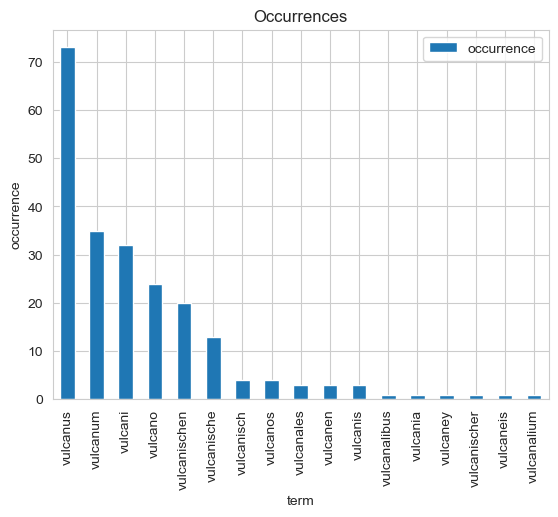

In [48]:
"""Create a bar visualisation of frequencies"""
dfvulc.plot(x="term", y="occurrence", kind="bar")
plt.title("Occurrences")
plt.xlabel("term")
plt.ylabel("occurrence")

In [19]:
#Loading list into NLTK object

wordtext = nltk.Text(lowercase) 

In [20]:
wordtext.concordance("vulcanales", width=120, lines=5)

Displaying 3 of 3 matches:
es die gnomi die gigantes vnnd auch die syluestres vnd vulcanales geboren werden dann jhr geburt gehet nit auß menschlic
alamander wohnet im fewr gibt ein exempel das auch die vulcanales im fewr nit verbrennen die vmbratiles wohnen im lufft 
elt geben vnd ander abscheidt es seind auch vielfaltig vulcanales gantz im fewr vnnd gar fewrin gesehen worden die nachf


In [22]:
wordtext.concordance("vulcania", width=120)

Displaying 1 of 1 matches:
ex secundis generationibus vt est ex hominibus realgare vulcania è bestiis etiam quæ ex tertia generatione in hanc sente


In [23]:
wordtext.concordance("vulcanalibus", width=120)

Displaying 1 of 1 matches:
lbig hauß sey also mercket von den gnomis vnd nymphis vulcanalibus dieselbigen haben jhre behaussung in jhren elementen 


In [24]:
wordtext.concordance("vulcaneis", width=120) #it is less clear here if spirits are meant. 

Displaying 1 of 1 matches:
 etiam quæ ex tertia generatione in hanc sententiam ex vulcaneis realgare q. s. put refac mensem philosophicum id est v


In [25]:
wordtext.concordance("vulcanen", width=120) #this is relevant.

Displaying 3 of 3 matches:
tlichs also wirdt der terpentin von den firmamentischen vulcanen in einen balsam transmutiert zum andern entpfacht er se
er zu mit jrem ernewern dann mit dem monn nun seind der vulcanen nit einer sondern viel vnd ein jeglicher hat sein beson
ehandelt vnnd gewandelt dergleichen mit den aethnischen vulcanen welche dergleichen wie obsteht dem menschen fürkommen v


In [28]:
wordtext.concordance("vulcanalium", width=120) #this is relevant.

Displaying 1 of 1 matches:
 in elemento terræ der vatter im firmament die mutter vulcanalium im fewr der vatter im firmament die mutter syluestriu


In [29]:
wordtext.concordance("vulcaney", width=120) #seems relevant

Displaying 1 of 1 matches:
d vel sitten dann fürwar so ein jrriges ding ist in der vulcaney vnd so ein seltzam schmiden das noch bißher keiner den 


In [30]:
wordtext.concordance("vulcano", width=120)

Displaying 24 of 24 matches:
ch der jhn gelernet hab der lerne vns auch die natur in vulcano die sey auch vnser leermeister dann so einer spricht th
ertz gibt ers vns weitter befilcht ers dem feür vnd dem vulcano der des feürs meister ist also volgt das dem vulcano da
em vulcano der des feürs meister ist also volgt das dem vulcano dasselbig befohlen ist darumb so ist die kunst gerecht 
fs ende sondern im schlacken verborgen jetzt ist es dem vulcano befohlen den schlacken von der artzney zuthun vnnd wie 
uch mit der artzney beschehen darzu auch mit dem innern vulcano dergleichen darumb soll sich der artzt der alchimia nic
es mucilagines welche die natürliche angeborne kunst in vulcano scheidt vnd formirt dann wie der mensch angeborne gesch
mensch angeborne geschickligkeit vnd kunst hatt also im vulcano auch zuuerstehen ist vnd andere stein mehr die also von
 mag seine kunst abgesehen vnnd abgestolen werden disem vulcano aber nicht dann den spiritum in seiner arbeit mag niema
er hergange

In [31]:
wordtext.concordance("vulcanos", width=120)

Displaying 4 of 4 matches:
ach wie der meister zimmert also haben die regiones jhr vulcanos die aedes jr vulcanos die geschicht jr vulcanos die zei
mmert also haben die regiones jhr vulcanos die aedes jr vulcanos die geschicht jr vulcanos die zeit im jahr jr vulcanos 
nes jhr vulcanos die aedes jr vulcanos die geschicht jr vulcanos die zeit im jahr jr vulcanos ders trifft der triffts vo
 vulcanos die geschicht jr vulcanos die zeit im jahr jr vulcanos ders trifft der triffts von diesen vulcanischen wird ic


In [32]:
wordtext.concordance("vulcanis", width=120)

Displaying 3 of 3 matches:
tt nichts biß an das endt beschaffen hat das weiter den vulcanis befohlen ist dieselbigen ding biß zum endt zubringen vn
en vnd zu schmiden auch das wir vnterworffen seindt den vulcanis vnter denn weder kelber noch kuh weder ander viech vnd 
m also ist der mensch auch in die zerbrechung geben den vulcanis der mensch zu dem der zu dem wie es dann vnter vns ersc


In [33]:
wordtext.concordance("vulcanus", width=120)

Displaying 25 of 73 matches:
 entlehnen oder selbst auffschlagen so ist er auch kein vulcanus hatt auch nicht den berg aethna abgelöscht vnnd da soll
ermeinten antonium geschmidet hatt der wol vnnd billich vulcanus geheissen soll werden derselbig hatt angezündt vnnd gef
s golts probiermeister genennet die poeten sprechen das vulcanus phoebum das ist die son in solchem bädlin abgewäschen v
uerber biß auff die hindersten feces verbrennen vnd der vulcanus muß schwebel vnd bech salpeter vnd oel angiessen vnd se
r ist die kunst vulcani darumb so ist noth zuwissen was vulcanus vermag alchimia ist ein kunst vulcanus ist der künstler
oth zuwissen was vulcanus vermag alchimia ist ein kunst vulcanus ist der künstler in jhr der nuhn vulcanus ist der ist d
ist ein kunst vulcanus ist der künstler in jhr der nuhn vulcanus ist der ist der kunst gewaltig der er nicht ist der ist
f das ende aber nicht gar biß auff das endt sondern der vulcanus muß es volenden so weit seindt alle ding beschaffen das
 di

In [34]:
wordtext.concordance(["der", "vulcanus"], width=120)

Displaying 25 of 37 matches:
reuerber biß auff die hindersten feces verbrennen vnd der vulcanus muß schwebel vnd bech salpeter vnd oel angiessen vnd 
uff das ende aber nicht gar biß auff das endt sondern der vulcanus muß es volenden so weit seindt alle ding beschaffen d
s werden soll das ist alchimia das ist der schmeltzer der vulcanus heist was das fewr thut ist alchimia auch in der kuch
den zu prima materia beschaffen vnd vber das so volgt der vulcanus hernach der machts in vltimam materiam durch die kuns
 die dise præfigurirt also scheiden sich von einander der vulcanus vnd der archeus das ist alchimia das nit auff sein en
tium also mit den andern elementen auch vnnd also sol der vulcanus in der grossen welt erkannt werden also auch in der k
a wie sie da eigentlich erscheinen jhr sehend wie das der vulcanus auß dem wasser ein vitriolum coagulirt auß dem wasser
ie ein vitriol ein saltz ein alumen im wasser vnd wie der vulcanus dieselbig scheidet vom wasser als man sihet also solt
ulc

In [35]:
wordtext.concordance(["das", "vulcanus"])

Displaying 2 of 2 matches:
ter genennet die poeten sprechen das vulcanus phoebum das ist die son in solch
ter genennet die poeten sprechen das vulcanus phoebum das ist die son in solch


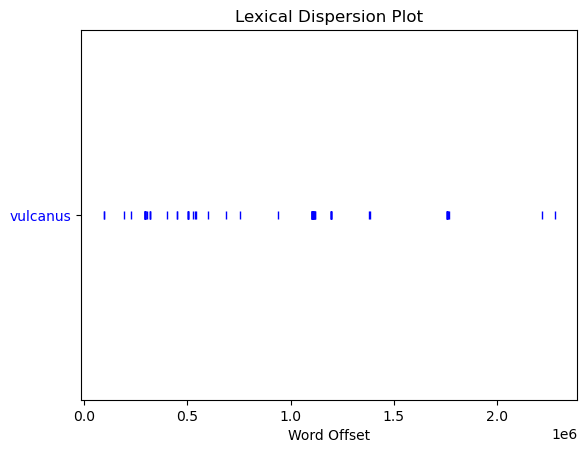

In [36]:
wordtext.dispersion_plot(["vulcanus"])

In [38]:
"""To identify co-occurrences of Vulcanus, I am first removing German stopwords as they will skew the result. 
The package originates from NLTK corpus. I also added some extra early modern German stopwords which cannot be found in the standard NLTK German corpus, 
as well as some Latin words"""

stoplist = ["a", "b", "c", "d","vnd", "vnnd", "jhr", "darumb", "dz", "jhm", "auff", "etc", "deß", "wol", "auß", 
            "darauß", "do", "nit", "wirdt", "hatt", "sey", "seind", "muß", "vns", "est", "allein", "gleich", 'dergleichen', 
           "de", "nuhn", "herauß", "dieweil", "seindt","ex", "zusammen", "mehr", "einander", "vt", "mag", "gibt", "gar",
           "thut","biß", "ille", "ad", "quid", "geben", "hie", "jhn", "wider", "kommen", "sollen", "sondern", "ohn", 
            "wiewol","kan", "wirt", "dasselbig", "selbs", "vber", "jhnen", "sonder", "kompt", "jhren", "wer", "bey", 
           "wann"]

new_stopwords = nltk.corpus.stopwords.words('german')

new_stopwords.extend(stoplist)

relevantwords = [word for word in lowercase if word not in new_stopwords] #I'm running this with new_stopwords


In [39]:
"""I am here identifying most common co-occurrences near the word "Vulcanus" using the Counter special dictionary in Python."""

window_size = 30 # Size of the context window
co_occurrences = Counter()

""" Looping through each word in the cleaned-up list of the Paracelsus corpus. I eliminated words in the list relate to spirits of fire and also adjectives """

for i, word in enumerate(relevantwords):
    if word == "vulcanus" or word == "vulcano" or word == "vulcanum" or word == "vulcani" \
    or word == "vulcanos" or word == "vulcanis" or word == "vulcanen" or word == "vulcaneis" \
    or word == "vulcaney" or word == "vulcanisch" or word == "vulcanische" or word == "vulcanischen":
        window = relevantwords[max(0, i - window_size):i] + relevantwords[i + 1:min(len(relevantwords), i + window_size + 1)]
        co_occurrences.update(window)

# Get the 21 most common co-occurring words
common_co_occurrences = co_occurrences.most_common(21)

vulcanus = {} #I create a dictionary to contain the associated terms and their occurrences

for word, count in common_co_occurrences:
    vulcanus[word] = count
    print(f"Word: {word}, Count: {count}")


Word: ding, Count: 120
Word: vulcanus, Count: 106
Word: natur, Count: 99
Word: menschen, Count: 99
Word: macht, Count: 93
Word: fewr, Count: 90
Word: mensch, Count: 84
Word: kunst, Count: 84
Word: holtz, Count: 62
Word: materia, Count: 60
Word: arth, Count: 59
Word: artzney, Count: 58
Word: materiam, Count: 56
Word: sulphur, Count: 53
Word: wesen, Count: 49
Word: gott, Count: 48
Word: wasser, Count: 48
Word: ersten, Count: 46
Word: wissen, Count: 46
Word: meister, Count: 45
Word: vltimam, Count: 43


In [40]:
"""Saving the dictionary in Pandas"""
vulcdf = pd.DataFrame(vulcanus.items(), columns=['Word', 'Occurrences'])
print(vulcdf)

        Word  Occurrences
0       ding          120
1   vulcanus          106
2      natur           99
3   menschen           99
4      macht           93
5       fewr           90
6     mensch           84
7      kunst           84
8      holtz           62
9    materia           60
10      arth           59
11   artzney           58
12  materiam           56
13   sulphur           53
14     wesen           49
15      gott           48
16    wasser           48
17    ersten           46
18    wissen           46
19   meister           45
20   vltimam           43


In [41]:
"""Here I'm preparing the data for squarify. I switched the first position of ding with vulcanus for visualisation purposes"""
vulcdf["Word"].loc[0] = "vulcanus (106)"
vulcdf["Occurrences"].loc[0] = 106
vulcdf["Word"].loc[1] = "ding (120)"
vulcdf["Occurrences"].loc[1] = 120
vulcdf["Word"].loc[2] = "natur (99)"
vulcdf["Word"].loc[3] = "menschen (99)"
vulcdf["Word"].loc[4] = "macht (93)"
vulcdf["Word"].loc[5] = "fewr (90)"
vulcdf["Word"].loc[6] = "mensch (84)"
vulcdf["Word"].loc[7] = "kunst (84)"
vulcdf["Word"].loc[8] = "holtz (62)"
vulcdf["Word"].loc[9] = "materia (60)"
vulcdf["Word"].loc[10] = "arth (59)"
vulcdf["Word"].loc[11] = "artzney (58)"
vulcdf["Word"].loc[12] = "materiam (56)"
vulcdf["Word"].loc[13] = "sulphur (53)"
vulcdf["Word"].loc[14] = "wesen (49)"
vulcdf["Word"].loc[15] = "gott (48)"
vulcdf["Word"].loc[16] = "wasser (48)"
vulcdf["Word"].loc[17] = "ersten (46)"
vulcdf["Word"].loc[18] = "wissen (46)"
vulcdf["Word"].loc[19] = "meister (45)"
vulcdf["Word"].loc[20] = "vltimam (43)"


C:\Users\johed\AppData\Local\Temp\ipykernel_37480\93047715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vulcdf["Word"].loc[0] = "vulcanus (106)"
C:\Users\johed\AppData\Local\Temp\ipykernel_37480\93047715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vulcdf["Occurrences"].loc[0] = 106
C:\Users\johed\AppData\Local\Temp\ipykernel_37480\93047715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vulcdf["Word"].loc[1] = "ding 

In [42]:
print(vulcdf)

              Word  Occurrences
0   vulcanus (106)          106
1       ding (120)          120
2       natur (99)           99
3    menschen (99)           99
4       macht (93)           93
5        fewr (90)           90
6      mensch (84)           84
7       kunst (84)           84
8       holtz (62)           62
9     materia (60)           60
10       arth (59)           59
11    artzney (58)           58
12   materiam (56)           56
13    sulphur (53)           53
14      wesen (49)           49
15       gott (48)           48
16     wasser (48)           48
17     ersten (46)           46
18     wissen (46)           46
19    meister (45)           45
20    vltimam (43)           43


In [44]:
"""Changing colour scheme in Squarify"""
colors = ['#b7094c','#91DCEA', '#64CDCC', '#5FBB68','#F9D23C', '#F9A729', '#FD6F30', '#e8ac65','#e76f51','#ef233c']

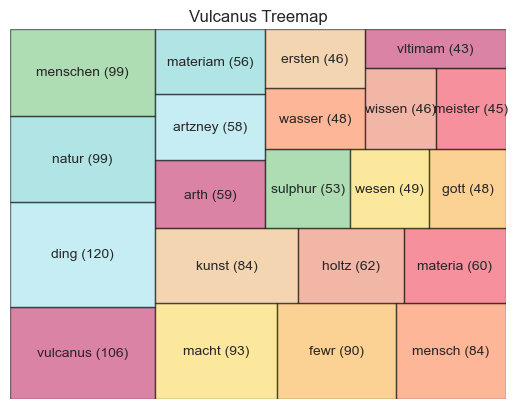

In [49]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= vulcdf["Occurrences"].values# proportions of the categories
label=vulcdf["Word"]
squarify.plot(sizes=sizes, label=label, alpha=0.5,color=colors, ec = 'black').set(title='Vulcanus Treemap')
plt.axis('off')
plt.show()

In [50]:
"""Here I saved the vulcan list to JSON for easy retrieval"""

with open("Paracelsus/vulcanus.json", 'w') as f:
    # indent=2 is not needed but makes the file human-readable if the data is nested
    json.dump(listvulc, f, indent=2) 

### Archeus

In [51]:
matches = re.findall(r'\b[a][r][c][h][e][a-z]{0,6}', strlowercase)
i=0
listarch=[]
for match1 in matches:
    listarch.append(match1)
    i=i+1

print(i)
print (listarch)

240
['archeus', 'archeo', 'archeischen', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archei', 'archelaus', 'archeo', 'archelaus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archei', 'archeum', 'archei', 'archeus', 'archeus', 'archeum', 'archeum', 'archeo', 'archeo', 'archeum', 'archeo', 'archei', 'archei', 'archei', 'archei', 'archei', 'archeus', 'archei', 'archei', 'archeum', 'archeus', 'archeitatem', 'archeitas', 'archeitas', 'archeitas', 'archelai', 'archeitet', 'archelaisch', 'archeum', 'archeo', 'archeum', 'archeischer', 'archeus', 'archeus', 'archei', 'archei', 'archeus', 'archeo', 'archeus', 'archeus', 'archelao', 'archeitatem', 'archeitas', 'archeitas', 'archeitate', 'archeitas', 'archeus', 'archeo', 'archei', 'arche', 'archeo', 'archeischen', 'archelai', 'archeitas', 'archelai', 'archeum', 'archei', 'archeus', 'archelaus', 'archelaus', 'archeus', 'archei', 'archeicum', 'archelaisch', 'archeus', 'archei', 'archeum', 'arc

In [53]:
"""Checking relevancy of some of the words"""
wordtext.concordance("archelaus", width=120, lines=10)

Displaying 8 of 8 matches:
ch berühmen zusein das ist jünger was setzt hermes vnd archelaus von vitriolo groß tugendt vnd es ist war sie sind in j
ner speculation also auch thomas vnd ander hermes vnnd archelaus das wissen jhr artzt all jhr müssen solche ding leer v
rediderunt aberret quibus imposuit euentus quemadmodum archelaus habet nos autem hoc loco asserimus rubeam lepram à mer
tiæ nolim hoc loco admittas rationem extractionis quam archelaus præscribit neque id genus alias separationes spagyrica
r dann eingesotten ist so wirdt ein oleitas da welcher archelaus auch gedenckt squinantiae cura vnd aller kranckheiten 
b so es eingesotten wirds zu einer oleitet darvon dann archelaus auch geschriben capvt l. de fugile vel fugilico aposte
rtis vnd ist ein anzeigung des anfangs noli me tangere archelaus heissets fuliginem hermes nambsets ferruginem wir aber
um de venenis eundem est recipe terdoliae quae utuntur archelaus geberus est angelica quae est ostritium transplantatum


In [54]:
"""I reduced the list by removing variants of archelaus as well as anything that has a space after arche-"""
matches = re.findall(r'\b[a][r][c][h][e][^l^\s][a-z]{0,6}', strlowercase)
i=0
listarch=[]
for match1 in matches:
    listarch.append(match1)
    i=i+1

print(i)
print (listarch)

223
['archeus', 'archeo', 'archeischen', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archei', 'archeo', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archei', 'archeum', 'archei', 'archeus', 'archeus', 'archeum', 'archeum', 'archeo', 'archeo', 'archeum', 'archeo', 'archei', 'archei', 'archei', 'archei', 'archei', 'archeus', 'archei', 'archei', 'archeum', 'archeus', 'archeitatem', 'archeitas', 'archeitas', 'archeitas', 'archeitet', 'archeum', 'archeo', 'archeum', 'archeischer', 'archeus', 'archeus', 'archei', 'archei', 'archeus', 'archeo', 'archeus', 'archeus', 'archeitatem', 'archeitas', 'archeitas', 'archeitate', 'archeitas', 'archeus', 'archeo', 'archei', 'archeo', 'archeischen', 'archeitas', 'archeum', 'archei', 'archeus', 'archeus', 'archei', 'archeicum', 'archeus', 'archei', 'archeum', 'archeus', 'archeus', 'archeum', 'archeus', 'archeus', 'archeo', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', '

In [55]:
"""Looking for variants of archaeus""" 

matches = re.findall(r'[a][r][c][h][a][e][a-z]{1,6}', strlowercase)
i=0
listarchae=[]
for match1 in matches:
    listarchae.append(match1)
    i=i+1

print(i)
print (listarchae)

3
['archaeipsa', 'archaegrata', 'archaeus']


In [56]:
wordtext.concordance("archaeus", width=120, lines=1)

Displaying 1 of 1 matches:
d was die andern drey gegeben haben vnnd werden vnd was archaeus terrae leiden muß vnnd der spara nympharum vnd der chao


In [58]:
"""Adding archaeus to the list"""
listarch.append ("archaeus")
print(listarch)

['archeus', 'archeo', 'archeischen', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archei', 'archeo', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archei', 'archeum', 'archei', 'archeus', 'archeus', 'archeum', 'archeum', 'archeo', 'archeo', 'archeum', 'archeo', 'archei', 'archei', 'archei', 'archei', 'archei', 'archeus', 'archei', 'archei', 'archeum', 'archeus', 'archeitatem', 'archeitas', 'archeitas', 'archeitas', 'archeitet', 'archeum', 'archeo', 'archeum', 'archeischer', 'archeus', 'archeus', 'archei', 'archei', 'archeus', 'archeo', 'archeus', 'archeus', 'archeitatem', 'archeitas', 'archeitas', 'archeitate', 'archeitas', 'archeus', 'archeo', 'archei', 'archeo', 'archeischen', 'archeitas', 'archeum', 'archei', 'archeus', 'archeus', 'archei', 'archeicum', 'archeus', 'archei', 'archeum', 'archeus', 'archeus', 'archeum', 'archeus', 'archeus', 'archeo', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'arch

In [59]:
wordtext.concordance("archen", width=120)

Displaying 2 of 2 matches:
dazumahl azot vnnd war sy sy sy gleich wie in einer arca archen verschlossen vnnd solch einzig stücke war erstlich an jh
keit wegen geursacht vnd seind die sündfluß noë aber der archen seind wir beraubt da muß schuldig vnd vnschuldig mit ein


In [60]:
#As archen refers to Noah's ark I removed it from the list
listarch.remove("archen")
print(listarch)

['archeus', 'archeo', 'archeischen', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archei', 'archeo', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archei', 'archeum', 'archei', 'archeus', 'archeus', 'archeum', 'archeum', 'archeo', 'archeo', 'archeum', 'archeo', 'archei', 'archei', 'archei', 'archei', 'archei', 'archeus', 'archei', 'archei', 'archeum', 'archeus', 'archeitatem', 'archeitas', 'archeitas', 'archeitas', 'archeitet', 'archeum', 'archeo', 'archeum', 'archeischer', 'archeus', 'archeus', 'archei', 'archei', 'archeus', 'archeo', 'archeus', 'archeus', 'archeitatem', 'archeitas', 'archeitas', 'archeitate', 'archeitas', 'archeus', 'archeo', 'archei', 'archeo', 'archeischen', 'archeitas', 'archeum', 'archei', 'archeus', 'archeus', 'archei', 'archeicum', 'archeus', 'archei', 'archeum', 'archeus', 'archeus', 'archeum', 'archeus', 'archeus', 'archeo', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'archeus', 'arch

In [61]:
"""I saved the "arch" list in json for easy retrieval"""

with open("Paracelsus/archeus.json", 'w') as f:
    # indent=2 is not needed but makes the file human-readable if the data is nested
    json.dump(listarch, f, indent=2) 

In [62]:
arrarch = np.array(listarch)

In [63]:
# Get the unique values and their counts
unique_values, counts = np.unique(arrarch, return_counts=True)

# Print the results

for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")
    arch = pd.DataFrame(list(zip(unique_values, counts)))

archaeus occurs 2 times
archei occurs 31 times
archeicam occurs 1 times
archeicum occurs 1 times
archeisch occurs 2 times
archeische occurs 1 times
archeischem occurs 1 times
archeischen occurs 6 times
archeischer occurs 1 times
archeitas occurs 7 times
archeitate occurs 1 times
archeitatem occurs 2 times
archeites occurs 1 times
archeitet occurs 1 times
archen occurs 1 times
archeo occurs 25 times
archeum occurs 37 times
archeus occurs 101 times
archevs occurs 2 times


In [64]:
arch.columns = ['term', 'occurrence']
print(arch)

           term  occurrence
0      archaeus           2
1        archei          31
2     archeicam           1
3     archeicum           1
4     archeisch           2
5    archeische           1
6   archeischem           1
7   archeischen           6
8   archeischer           1
9     archeitas           7
10   archeitate           1
11  archeitatem           2
12    archeites           1
13    archeitet           1
14       archen           1
15       archeo          25
16      archeum          37
17      archeus         101
18      archevs           2


In [65]:
arch.sort_values(by=["occurrence"], inplace=True, ascending = False)
print(arch)

           term  occurrence
17      archeus         101
16      archeum          37
1        archei          31
15       archeo          25
9     archeitas           7
7   archeischen           6
11  archeitatem           2
0      archaeus           2
4     archeisch           2
18      archevs           2
8   archeischer           1
6   archeischem           1
10   archeitate           1
5    archeische           1
12    archeites           1
13    archeitet           1
14       archen           1
3     archeicum           1
2     archeicam           1


Text(0, 0.5, 'occurrence')

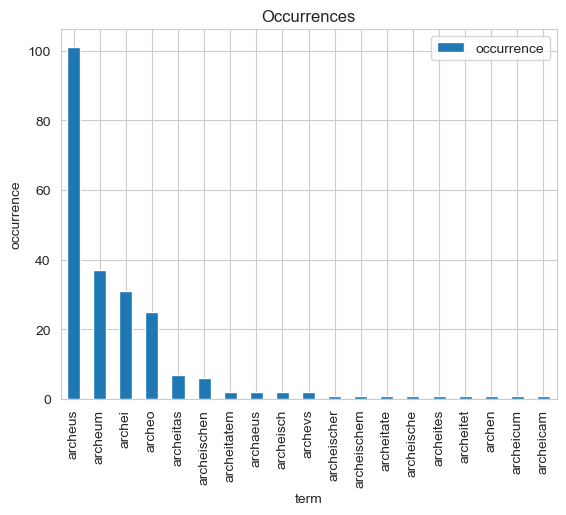

In [66]:
arch.plot(x="term", y="occurrence", kind="bar")
plt.title("Occurrences")
plt.xlabel("term")
plt.ylabel("occurrence")

In [67]:
wordtext.concordance("archeus", width=120)

Displaying 25 of 101 matches:
 glück das jhr diesen geist verstehet so ist er als ein archeus als de archeo stehet vnd weiter hie nit melden damit wi
 darauß die speiß ist einig vnnd ist menschen speiß der archeus aber der bereits dem menschen in sein monarchey darumb 
y gefürt werde dann was die narung ist das meistert der archeus im magen vnnd macht darauß was jhm zustehet als ein sch
en werde in jhrem wesen dann im selben orth kan sie der archeus nicht anders machen dann das auß jhr das sie ist alles 
icht zwo darumb haben sie eine primam materiam aber der archeus der ißt anders der gehet in sein monarchey des er ißt a
was da transmutiert werde vnnd wie das ist was auch der archeus an jhm habe das er auß dem das eins ist do machet männi
ltimam materiam durch die kunst alchimiæ also volgt der archeus der inwendig vulcanus hernach der weiß zu circulirn vnd
rt also scheiden sich von einander der vulcanus vnd der archeus das ist alchimia das nit auff sein end kommen ist zum e
m magicæ a

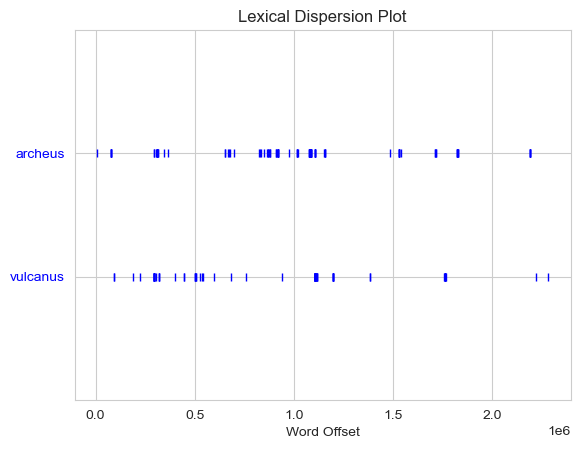

In [68]:
wordtext.dispersion_plot(["archeus", "vulcanus"])

In [69]:
"""Next I'm identifying most common co-occurrences near the word "Archeus" using the Counter special dictionary in Python."""

window_size = 30 # Size of the context window

co_occurrences = Counter()

""" Looping through each word in the cleaned-up list of the Paracelsus corpus"""

for i, word in enumerate(relevantwords):
    if word == "archeus" or word == "archeo" or word == "archei" or word == "archeum" or word == "archeitet" \
    or word == "archevs" or word == "archaeus" or word == "archeitas" or word == "archeitatem" or word == "archeischem" \
    or word == "archeitate" or word == "archeites" or word == "archeisch" or word == "archeischen" or word == "archeischer" \
    or word == "archeische" or word == "archeicum" or word == "archeicam":
        # Create the window around the word
        window = relevantwords[max(0, i - window_size):i] + relevantwords[i + 1:min(len(relevantwords), i + window_size + 1)]
        co_occurrences.update(window)

common_co_occurrences = co_occurrences.most_common(21)

archeus = {} #creating a dictionary to contain the associated terms and their occurrences

for word, count in common_co_occurrences:
    archeus[word] = count
    print(f"Word: {word}, Count: {count}")

Word: archeus, Count: 91
Word: menschen, Count: 70
Word: wasser, Count: 68
Word: saltz, Count: 68
Word: ding, Count: 64
Word: materia, Count: 61
Word: ersten, Count: 60
Word: ares, Count: 60
Word: arth, Count: 55
Word: erden, Count: 55
Word: artzney, Count: 52
Word: macht, Count: 51
Word: krafft, Count: 51
Word: metallen, Count: 48
Word: ligt, Count: 47
Word: sulphur, Count: 46
Word: natur, Count: 44
Word: farben, Count: 43
Word: leib, Count: 42
Word: mercurius, Count: 41
Word: non, Count: 41


In [70]:
archdf = pd.DataFrame(archeus.items(), columns=['Word', 'Occurrences'])
print(archdf)

         Word  Occurrences
0     archeus           91
1    menschen           70
2      wasser           68
3       saltz           68
4        ding           64
5     materia           61
6      ersten           60
7        ares           60
8        arth           55
9       erden           55
10    artzney           52
11      macht           51
12     krafft           51
13   metallen           48
14       ligt           47
15    sulphur           46
16      natur           44
17     farben           43
18       leib           42
19  mercurius           41
20        non           41


In [71]:
#Here I'm preparing the data for squarify
archdf["Word"].loc[0] = "archeus (91)"
archdf["Word"].loc[1] = "menschen (70)"
archdf["Word"].loc[2] = "wasser (68)"
archdf["Word"].loc[3] = "saltz (68)"
archdf["Word"].loc[4] = "ding (64)"
archdf["Word"].loc[5] = "materia (61)"
archdf["Word"].loc[6] = "ersten (60)"
archdf["Word"].loc[7] = "ares (60)"
archdf["Word"].loc[8] = "arth (55)"
archdf["Word"].loc[9] = "erden (55)"
archdf["Word"].loc[10] = "artzney (52)"
archdf["Word"].loc[11] = "macht (51)"
archdf["Word"].loc[12] = "krafft (51)"
archdf["Word"].loc[13] = "metallen (48)"
archdf["Word"].loc[14] = "ligt (47)"
archdf["Word"].loc[15] = "sulphur (46)"
archdf["Word"].loc[16] = "natur (44)"
archdf["Word"].loc[17] = "farben (43)"
archdf["Word"].loc[18] = "leib (42)"
archdf["Word"].loc[19] = "mercur. (41)"
archdf["Word"].loc[20] = "non (41)"

C:\Users\johed\AppData\Local\Temp\ipykernel_37480\3335974875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archdf["Word"].loc[0] = "archeus (91)"
C:\Users\johed\AppData\Local\Temp\ipykernel_37480\3335974875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archdf["Word"].loc[1] = "menschen (70)"
C:\Users\johed\AppData\Local\Temp\ipykernel_37480\3335974875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archdf["Word"].loc[2]

In [72]:
colors = ['#b7094c','#91DCEA', '#64CDCC', '#5FBB68','#F9D23C', '#F9A729', '#FD6F30', '#e8ac65','#e76f51','#ef233c']

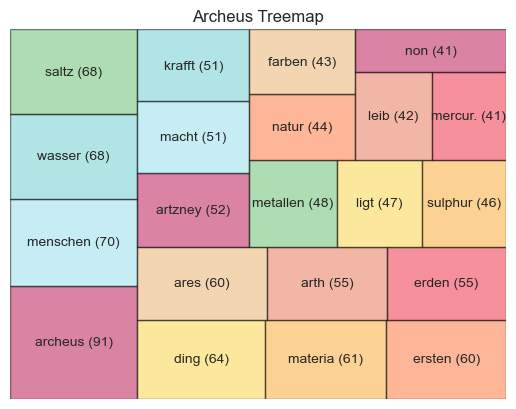

In [73]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= archdf["Occurrences"].values# proportions of the categories
label=archdf["Word"]
squarify.plot(sizes=sizes, label=label, alpha=0.5,color=colors, ec = 'black').set(title='Archeus Treemap')
plt.axis('off')
plt.show()

### Here onwards I have been looking at iliaster, iliastes and ares

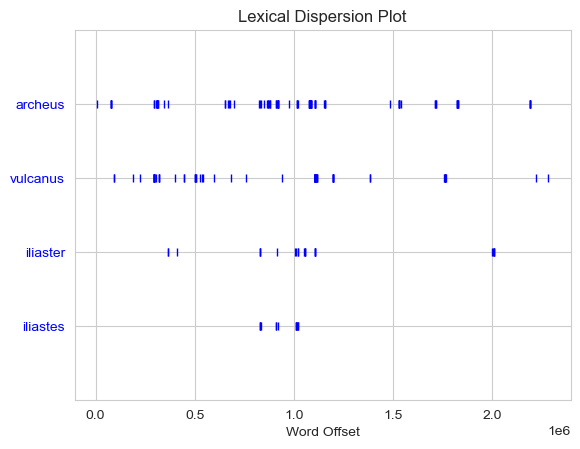

In [75]:
"""Looking at iliaster and iliastes"""
wordtext.dispersion_plot(["archeus", "vulcanus", "iliaster", "iliastes"])

In [76]:
matches = re.findall(r'\b[i|y][l][i][a][s][t][e|r][^s^\s][a-z]{0,7}', strlowercase)
i=0
listiliaster=[]
for match1 in matches:
    listiliaster.append(match1)
    i=i+1

print(i)
print (listiliaster)

129
['iliaster', 'iliaster', 'iliastro', 'iliaster', 'iliastrum', 'yliastro', 'yliastri', 'yliastro', 'yliastrum', 'yliaster', 'yliastro', 'iliastro', 'iliastri', 'iliastro', 'iliastrum', 'iliaster', 'iliaster', 'iliaster', 'iliastrum', 'iliastri', 'iliastro', 'iliastri', 'iliastro', 'iliastro', 'iliastrum', 'iliastrum', 'iliastrum', 'iliastri', 'iliastro', 'iliastrum', 'iliastrinaturam', 'iliastrum', 'iliastrum', 'iliastro', 'iliaster', 'iliaster', 'iliaster', 'iliaster', 'iliastri', 'iliaster', 'yliastri', 'iliaster', 'iliastrum', 'yliaster', 'yliastrum', 'yliaster', 'yliaster', 'yliaster', 'yliastro', 'iliaster', 'iliaster', 'yliastri', 'yliastro', 'yliastri', 'yliastri', 'iliastris', 'iliaster', 'iliastren', 'yliastro', 'yliaster', 'yliastro', 'yliastro', 'yliastrum', 'yliastro', 'yliastro', 'yliaster', 'yliastro', 'yliaster', 'yliaster', 'yliastro', 'yliastro', 'yliastro', 'yliaster', 'iliastro', 'iliastro', 'iliastro', 'iliaster', 'iliaster', 'iliaster', 'iliaster', 'yliaster', '

In [77]:
matches = re.findall(r'\b[i|y][l][i][a][s][t][e|i][^r][a-z]{0,7}', strlowercase)
i=0
listiliastes=[]
for match1 in matches:
    listiliastes.append(match1)
    i=i+1

print(i)
print (listiliastes)

27
['iliastis', 'iliastis', 'iliastes', 'iliastes', 'iliastes', 'iliastis', 'iliasti tribuer', 'iliastes', 'iliastis', 'iliastes', 'iliastes', 'iliastis', 'iliaste nato', 'iliastes', 'iliastis', 'iliastes', 'iliastes', 'iliastes', 'iliastes', 'iliaste vt', 'iliastis', 'iliastes', 'iliastis', 'iliastes', 'iliastes', 'yliastes', 'yliaste primo']


In [78]:
wordtext.concordance(["iliaster"], width=120)

Displaying 24 of 24 matches:
imaginatione de vita longa quid sit aestimatio quid sit iliaster imaginationis iliadus mentis ilech ascendens magnus mag
dus mentis ilech ascendens magnus magni euestri was der iliaster vnd euestrum solis vnnd der aquaster vt de melusina leg
is productum est suum malum hoc est tartarum naturæ nam iliaster peperit tria in natura dolentis viscum secundæ generati
 præter quintam essentiam virtutes reperiuntur est enim iliaster sanctitus alter verò iliaster paratetus tertius autem i
utes reperiuntur est enim iliaster sanctitus alter verò iliaster paratetus tertius autem iliaster ille magnus de priore 
r sanctitus alter verò iliaster paratetus tertius autem iliaster ille magnus de priore sic accipe quòd sanctitus ille lo
uandoque archeus eius taphnæus ac vniuersa eorum proles iliaster cæteri per imperitum ac rudem dignosci medicum non queu
dz wir sehen wie vielerley species gott auß dem einigen iliaster geschaffen hat wie groß sein magnalia auff erden ersche
 is

In [79]:
wordtext.concordance(["iliastes"], width=120)

Displaying 14 of 14 matches:
nquimus dum infrà ad illa venerimus porrò si impelletur iliastes ille summus aut aliquo saltem haberet opus facilè eò qu
n æthere ac nubibus collocaretur sed semel saturauit se iliastes vt porrò non careat neque aliquo opus habeat quare in h
que quæcunque suprà diximus quæ sub chao id quod summus iliastes existit delitescunt et in manus ea quibus de mentionem 
potuit tamen hîc præbuit occasionem id quod extrinsecus iliastes fuit caput quartum restat adhuc in hac monarchia cuius 
ra destructionem trium primarum corporis sui sicut enim iliastes in quatuor elementis velut mater producit relolleum che
autem est congelatus similiter suo elemento quemadmodum iliastes produxit quare separationes naturæ denuò resoluunt id q
dominatur quæ infensa est insidias struit atque hæc est iliastes idque in hanc sententiam in mineralibus hæ anatomiæ con
tura quatuor produxerunt elementorum matrices vtpote ex iliastes iliastes prima mater est omnium rerum ex qua omnia ortu
uor

In [80]:
wordtext.concordance(["yliaster"], width=120)

Displaying 12 of 12 matches:
uod est resolutum coagulatum hæc externa peperit quoque yliaster tria in natura dolentis viscum secundæ generationis per
öpfft vnnd das leben der geschöpfft anfenglich hatt der yliaster die corpora gemacht darnach das leben derselbigen dense
fen das ander laßt er ligen also dermassen also ist der yliaster gewesen das er hatt auß dem ideos geschnitten ein mensc
hor liber primvs de elemento aeris i. am ersten ist der yliaster getheilet worden der dann nichts ist vnd hatt geben die
r hinauß gibt das nimpt er nit wider zu jhm aber dieser yliaster zeucht wider die element in sich das zergeht vnnd wirdt
nocte wie vormahls steht im ersten tractat das der erst yliaster mit allen farben gestelt ist heytteri vnd schöni in ein
im andern darumb ist daß das element terrae sein sonder yliaster die narung zu geberen vnd ist auß der vrsachen ein elem
dann do ist gewesen dz element vnnd die andern drey ein yliaster dorinn sind gestanden element aber sie sind gescheiden 
sin

In [81]:
wordtext.concordance(["yliastes"], width=120)

Displaying 1 of 1 matches:
brino præcipitato in sulphure chironio reollino ex ares yliastes primis natura omne vulnus corrosiuum quod productum à n


In [82]:
"""Looking for ares"""
matches = re.findall(r'\b[a][r][e][a-z]{0,7}', strlowercase)
i=0
listares=[]
for match1 in matches:
    listares.append(match1)
    i=i+1

print(i)
print (listares)

232
['arena', 'arenam', 'aren', 'arena', 'arena', 'areopagita', 'arena', 'arena', 'arenam', 'arenam', 'arena', 'arenam', 'arena', 'arenam', 'arena', 'arenam', 'arenae', 'arenae', 'arenam', 'arenae', 'arenam', 'arenarum', 'aren', 'arena', 'aren', 'arenarum', 'arenosa', 'aren', 'arena', 'arena', 'arenam', 'arenam', 'arenam', 'aren', 'aren', 'arena', 'arenam', 'arena', 'arena', 'arena', 'arena', 'arena', 'arena', 'arena', 'arena', 'arena', 'arena', 'arena', 'arenam', 'aren', 'aren', 'arena', 'arena', 'arena', 'arena', 'aren', 'arena', 'aren', 'arenosa', 'aren', 'arenosisch', 'arenam', 'ares', 'aren', 'arena', 'arena', 'arena', 'arena', 'aren', 'arenam', 'arescit', 'aren', 'arena', 'arenosus', 'ares', 'arena', 'arena', 'arenam', 'arenosa', 'arenosa', 'arenul', 'arena', 'arena', 'arena', 'arenam', 'arenosa', 'arenam', 'arenam', 'arena', 'arenosum', 'arena', 'arena', 'arena', 'arenam', 'aren', 'arenul', 'arenam', 'aren', 'arena', 'arena', 'arena', 'arenam', 'arenam', 'ares', 'ares', 'ares', 

In [83]:
wordtext.concordance(["aretis"], width=120, lines=101)

Displaying 1 of 1 matches:
rtet neque verò etiam ex ingenio microcosmi sed magis ex aretis proprietate vnde etiam iliastrum deriuatur quod vi morbu


In [84]:
wordtext.concordance(["aretem"], width=120, lines=101)

Displaying 2 of 2 matches:
ue libris tractauimus quantum ad complexiones atque adeò aretem ipsum attinet sciendum est id vniuersum quod naturæ prob
imis vnamquamque dosim secundùm proprium ipsius ac verum aretem vel calido consistere vel frigido vbi etiam sciendum in 


In [85]:
matches = re.findall(r'\b[a][r][e][t|s][a-z]{0,7}', strlowercase)
i=0
listares=[]
for match1 in matches:
    listares.append(match1)
    i=i+1

print(i)
print (listares)

76
['ares', 'arescit', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'aretem', 'aretem', 'ares', 'aretis', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares', 'ares']


In [86]:
wordtext.concordance(["ares"], width=120)

Displaying 25 of 72 matches:
ken den yliastrum der philosophey nicht ich geschweig deß ares vos ducati homines in ewern wirdigen thalarn was will der
r sonnen das nicht in den augen sey auß allem archeischen ares nymphischen vnd himmlischen tugenden als die sonn gibt li
em quòd corpus esse solidum existimetur eiusmodi est enim ares vt si lupum speculatio referat lupus appareat quod quidem
n suo nequaquam æquale est nihilo tamen ob id minus ipsum ares in se gestat huiusmodi quidem naturam rei ingenium rudes 
iuis resistit operaturque tam per chymicum quàm archeicum ares quin etiam robustissimum quodque corpus cum debilissimo t
ssimo temperat in vno gradu robur siquidem præter roboris ares perinde est atque debilitas infra gradum ares roboris exi
ter roboris ares perinde est atque debilitas infra gradum ares roboris existens firmiori quidem adimit quod imbecilliori
est cui salamandrina adesse possit essentia melosinicúmve ares sed potius retorta quædam distillatio ex medio centri sup
um 

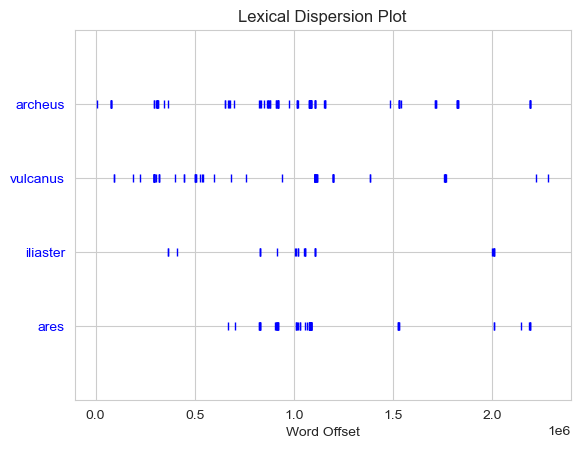

In [87]:
wordtext.dispersion_plot(["archeus", "vulcanus", "iliaster", "ares"])